## Install modules to environment

In [1]:
%pip install pandas numpy requests importlib

Note: you may need to restart the kernel to use updated packages.


## Import modules

In [2]:
from Backtesting.dataFetchers.marketDataFetchers import MarketDataFetcher
from Backtesting.dataFetchers.onChainMetricsFetchers import OnChainMetricsFetcher
from Backtesting.backtest import Backtest
from Backtesting.strategies.hmmStrategy import HMMStrategy

import pandas as pd
import numpy as np
from datetime import datetime



## Fetch Data

Input API key and desired interval and window

In [3]:
API_KEY = "GlYxSZP9hnooNl6gGAjtkptkeqehSnk5C60Akhpw5zupBK6O"
LIMIT = 1000


### Market Data

In [4]:
MARKET_DATA_BASE_URL = "https://api.datasource.cybotrade.rs/coinbase/candle"

SYMBOL = "BTC-USD" # Can be any symbol available on Coinbase
INTERVAL = "1h" # Can be any interval such as "1d", "1h", "15m", etc.

In [5]:
# start_time = int(datetime(2023, 1, 1).timestamp() * 1000)
# end_time = int(datetime(2024, 12, 31, 23, 59).timestamp() * 1000)

bt_start_time = int(datetime(2023, 4, 1).timestamp() * 1000)
bt_end_time = int(datetime(2024, 3, 31, 23, 59).timestamp() * 1000)


In [6]:
market_data_fetcher = MarketDataFetcher(API_KEY, MARKET_DATA_BASE_URL, SYMBOL, LIMIT)
market_data_fetcher.fetch(bt_start_time, bt_end_time, INTERVAL)



Fetching 1h data for BTC-USD from 2023-03-31 16:00:00 to 2024-03-31 15:59:00...
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
💾 Saved to datasets/BTC-USD_1h_Training data_1712678400000_to_1711900740000.csv with 9000 rows.
                         open      high       low     close       volume
timestamp                                                               
2024-04-09 11:00:00  70571.83  70909.01  70571.81  70794.18   467.688822
2024-04-09 12:00:00  70794.17  70964.32  70637.48  70683.96   344.272836
2024-04-09 13:00:00  70680.73  70946.26  69917.12  69935.22   770.713309
2024-04-09 14:00:00  69931.94  70438.43  68618.76  69349.96  2046.780511
2024-04-09 15:00:00  69350.51  69352.55  685

### On Chain Metrics Data (TBU)

In [7]:
# METRICS_DATA_BASE_URL = "https://api.datasource.cybotrade.rs/cryptoquant"

# CURRENCY = "btc" # Can be any symbol available on CryptoQuant
# WINDOW = "hour" # Can be any window such as "day", "hour", "block", etc


In [8]:
# on_chain_fetcher = Backtest.OnChainMetricsFetcher(API_KEY, METRICS_DATA_BASE_URL, CURRENCY, INTERVAL, LIMIT)
# on_chain_fetcher.fetch(start_time, end_time)

## Perform Backtesting

In [9]:
bt = Backtest(market_data_fetcher.saved_filepath, HMMStrategy(market_data_fetcher.saved_filepath, market_data_fetcher.saved_filepath, 0.5, 0.5), 1000000, 30, 0.0006)

         1 -965354.52657743             +nan
         2 -841937.03603302 +123417.49054441
         3 -826862.08199234  +15074.95404068
         4 -823755.33222147   +3106.74977087
         5 -823738.62186988     +16.71035159
         6 -823736.61477797      +2.00709191
         7 -823734.96843398      +1.64634399
         8 -823732.08423584      +2.88419814
         9 -823726.93099104      +5.15324481
        10 -823715.10569443     +11.82529661
        11 -823701.00580043     +14.09989400
        12 -823694.57650708      +6.42929335
        13 -823691.60966414      +2.96684295
        14 -823689.46327646      +2.14638768
        15 -823687.12082744      +2.34244902
        16 -823683.76443219      +3.35639525
        17 -823678.49484298      +5.26958921
        18 -823671.07828680      +7.41655618
        19 -823659.91085668     +11.16743013
        20 -823641.74783256     +18.16302412
        21 -823618.78709190     +22.96074066
        22 -823597.89555171     +20.89154019
        23

Converged: True
Final log likelihood: -821010.1034759842
State Labels: {1: 'bullish', 0: 'bearish', 2: 'neutral'}
               timestamp      open     close  log_return  state market_state
25   2023-04-01 17:00:00  28340.73  28389.24    0.001706      0      bearish
26   2023-04-01 18:00:00  28388.22  28389.88    0.000023      0      bearish
27   2023-04-01 19:00:00  28389.88  28397.64    0.000273      0      bearish
28   2023-04-01 20:00:00  28395.05  28457.26    0.002097      0      bearish
29   2023-04-01 21:00:00  28459.73  28495.29    0.001335      0      bearish
...                  ...       ...       ...         ...    ...          ...
8995 2024-04-09 11:00:00  70571.83  70794.18    0.003129      1      bullish
8996 2024-04-09 12:00:00  70794.17  70683.96   -0.001558      1      bullish
8997 2024-04-09 13:00:00  70680.73  69935.22   -0.010649      1      bullish
8998 2024-04-09 14:00:00  69931.94  69349.96   -0.008404      1      bullish
8999 2024-04-09 15:00:00  69350.51  692

        29 -821253.15251745    +337.05261069
        30 -821127.07601678    +126.07650067
        31 -821066.97460194     +60.10141484
        32 -821037.74766214     +29.22693980
        33 -821023.13367649     +14.61398565
        34 -821016.23427865      +6.89939784
        35 -821013.06418983      +3.17008883
        36 -821011.56432177      +1.49986806
        37 -821010.83237257      +0.73194920
        38 -821010.46819220      +0.36418036
        39 -821010.28505104      +0.18314117
        40 -821010.19245100      +0.09260004
        41 -821010.14551273      +0.04693827
        42 -821010.12169676      +0.02381597
        43 -821010.10960973      +0.01208703
        44 -821010.10347598      +0.00613374


## Identify the best threshold from heatmap

Running with bullish=0.40, bearish=0.30
9000
8974
9000
Running with bullish=0.40, bearish=0.35
9000
8974
9000
Running with bullish=0.40, bearish=0.40
9000
8974
9000
Running with bullish=0.40, bearish=0.45
9000
8974
9000
Running with bullish=0.40, bearish=0.50
9000
8974
9000
Running with bullish=0.40, bearish=0.55
9000
8974
9000
Running with bullish=0.40, bearish=0.60
9000
8974
9000
Running with bullish=0.45, bearish=0.30
9000
8974
9000
Running with bullish=0.45, bearish=0.35
9000
8974
9000
Running with bullish=0.45, bearish=0.40
9000
8974
9000
Running with bullish=0.45, bearish=0.45
9000
8974
9000
Running with bullish=0.45, bearish=0.50
9000
8974
9000
Running with bullish=0.45, bearish=0.55
9000
8974
9000
Running with bullish=0.45, bearish=0.60
9000
8974
9000
Running with bullish=0.50, bearish=0.30
9000
8974
9000
Running with bullish=0.50, bearish=0.35
9000
8974
9000
Running with bullish=0.50, bearish=0.40
9000
8974
9000
Running with bullish=0.50, bearish=0.45
9000
8974
9000
Running wi

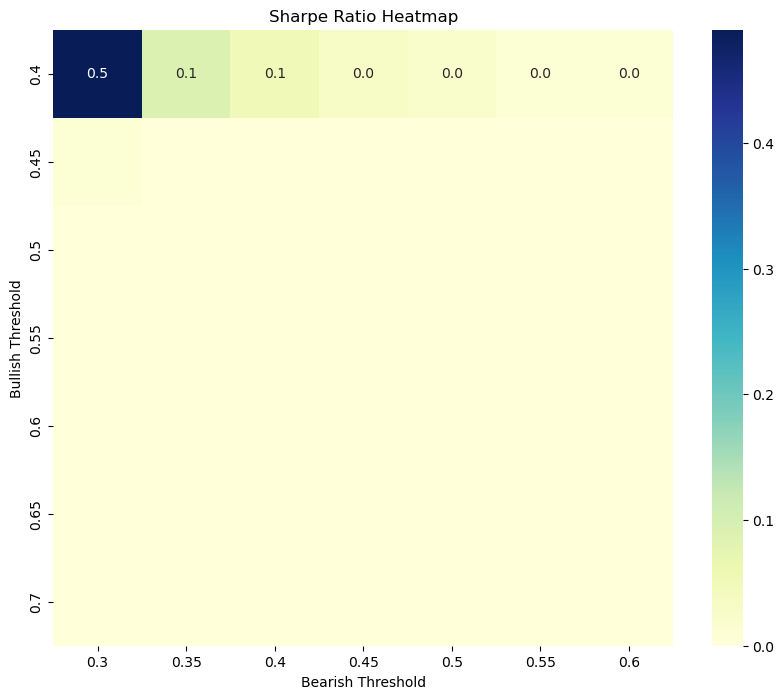

In [10]:
bt.run_backtest_heatmap(metric='Sharpe Ratio')


## Perform Forward Testing Using The Best Threshold

### Fetch / Load Foward Dataset

In [11]:

ft_start_time = int(datetime(2024, 4, 1).timestamp() * 1000)
ft_end_time = int(datetime(2025, 4, 1, 23, 59).timestamp() * 1000)


In [12]:
market_data_fetcher = MarketDataFetcher(API_KEY, MARKET_DATA_BASE_URL, SYMBOL, LIMIT)
market_data_fetcher.fetch(ft_start_time, ft_end_time, INTERVAL)



Fetching 1h data for BTC-USD from 2024-03-31 16:00:00 to 2025-04-01 15:59:00...
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
✅ Retrieved 1000 candles. Total: 1000
💾 Saved to datasets/BTC-USD_1h_Training data_1744300800000_to_1743523140000.csv with 9000 rows.
                         open      high       low     close       volume
timestamp                                                               
2025-04-10 11:00:00  81722.40  81897.05  81455.61  81829.71   120.593691
2025-04-10 12:00:00  81829.71  82398.91  81409.00  81672.02   747.649884
2025-04-10 13:00:00  81673.27  81912.56  80722.00  80812.99   937.494541
2025-04-10 14:00:00  80815.24  81776.61  80555.52  81218.13   958.167358
2025-04-10 15:00:00  81215.26  81297.99  785

In [13]:
bt.set_data(market_data_fetcher.saved_filepath)
bt.set_strategy(HMMStrategy(market_data_fetcher.saved_filepath, market_data_fetcher.saved_filepath, bullish_threshold=0.4, bearish_threshold=0.3))

         1 -994250.68325481             +nan
         2 -904885.95484025  +89364.72841457
         3 -886986.75012936  +17899.20471089
         4 -884500.98250457   +2485.76762479
         5 -883581.89875244    +919.08375213
         6 -883154.58964329    +427.30910915
         7 -882957.48339699    +197.10624631
         8 -882829.52466947    +127.95872751
         9 -882755.97650949     +73.54815998
        10 -882715.45174991     +40.52475958
        11 -882691.99207042     +23.45967948
        12 -882661.80506289     +30.18700753
        13 -882633.78129028     +28.02377261
        14 -882611.19257658     +22.58871371
        15 -882595.51460461     +15.67797197
        16 -882587.89296038      +7.62164422
        17 -882583.31884863      +4.57411175
        18 -882579.82268932      +3.49615931
        19 -882576.27881845      +3.54387087
        20 -882570.94884640      +5.32997205
        21 -882560.91859222     +10.03025419
        22 -882545.39744418     +15.52114804
        23

Converged: True
Final log likelihood: -882362.3565084302
State Labels: {2: 'bullish', 0: 'bearish', 1: 'neutral'}
               timestamp      open     close  log_return  state market_state
25   2024-04-01 17:00:00  68576.38  68751.06    0.002485      1      neutral
26   2024-04-01 18:00:00  68745.64  68941.19    0.002762      1      neutral
27   2024-04-01 19:00:00  68941.19  69709.52    0.011083      0      bearish
28   2024-04-01 20:00:00  69709.49  69769.94    0.000866      1      neutral
29   2024-04-01 21:00:00  69769.94  69616.43   -0.002203      1      neutral
...                  ...       ...       ...         ...    ...          ...
8995 2025-04-10 11:00:00  81722.40  81829.71    0.001312      0      bearish
8996 2025-04-10 12:00:00  81829.71  81672.02   -0.001929      0      bearish
8997 2025-04-10 13:00:00  81673.27  80812.99   -0.010574      0      bearish
8998 2025-04-10 14:00:00  80815.24  81218.13    0.005001      0      bearish
8999 2025-04-10 15:00:00  81215.26  786

        72 -882362.39079942      +0.01667992
        73 -882362.37703631      +0.01376311
        74 -882362.36573657      +0.01129974
        75 -882362.35650843      +0.00922814


In [14]:
bt.run()

9000
8974
9000


In [15]:
performance = bt.get_performance_results()

for key, value in performance.items():
    print(f"{key}: {value}")

Start Trade Date: 2024-03-31 16:00:00
End Trade Date: 2025-04-10 15:00:00
Final Portfolio Value: 115948.70223402552
Total Return (%): -88.40512977659745
Number of Trades: 14004
Win Rate (%): 0.0
Max Drawdown (%): -28.93
Sharpe Ratio: 0.0


In [16]:
bt.get_trade_logs_csv()

Trade logs saved to backtest_trade_logs.csv
